# Exam Score Prediction using Linear Regression

## Project Overview
This project predicts exam scores using various student features including age, study hours, class attendance, sleep quality, and other factors. We'll implement linear regression from scratch using NumPy.

## Dataset
- **File**: Exam_Score_Prediction.csv
- **Samples**: 20,000 student records
- **Target**: exam_score
- **Features**: 12 input features including demographic, behavioral, and environmental factors

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set random seed for reproducibility
np.random.seed(50)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

## Step 1: Load and Explore Data

In [35]:
# Load the dataset
df = pd.read_csv('../Exam_Score_Prediction.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst Few Rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

Dataset Shape: (20000, 13)

First Few Rows:
   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.

In [36]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical Columns: {categorical_cols}")
print(f"Numerical Columns: {numerical_cols}")


Missing Values:
student_id         0
age                0
gender             0
course             0
study_hours        0
                  ..
sleep_quality      0
study_method       0
facility_rating    0
exam_difficulty    0
exam_score         0
Length: 13, dtype: int64

Data Types:
student_id           int64
age                  int64
gender              object
course              object
study_hours        float64
                    ...   
sleep_quality       object
study_method        object
facility_rating     object
exam_difficulty     object
exam_score         float64
Length: 13, dtype: object

Categorical Columns: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
Numerical Columns: ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']


## Step 2: Data Preprocessing and Feature Encoding

In [37]:
# Create a copy for preprocessing
df_processed = df.copy()

# Separate features and target
X = df_processed.drop('exam_score', axis=1)
y = df_processed['exam_score'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify columns to encode
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    if col in X.columns:
        print(f"{col}: {X[col].nunique()} unique values - {X[col].unique()[:5]}")

Features shape: (20000, 12)
Target shape: (20000,)

Unique values in categorical columns:
gender: 3 unique values - ['male' 'other' 'female']
course: 7 unique values - ['diploma' 'bca' 'b.sc' 'b.tech' 'bba']
internet_access: 2 unique values - ['yes' 'no']
sleep_quality: 3 unique values - ['poor' 'average' 'good']
study_method: 5 unique values - ['coaching' 'online videos' 'mixed' 'self-study' 'group study']
facility_rating: 3 unique values - ['low' 'medium' 'high']
exam_difficulty: 3 unique values - ['hard' 'moderate' 'easy']


In [38]:
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
        print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nFeatures after encoding:")
print(X.head())

Encoded gender: {'female': np.int64(0), 'male': np.int64(1), 'other': np.int64(2)}
Encoded course: {'b.com': np.int64(0), 'b.sc': np.int64(1), 'b.tech': np.int64(2), 'ba': np.int64(3), 'bba': np.int64(4), 'bca': np.int64(5), 'diploma': np.int64(6)}
Encoded internet_access: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded sleep_quality: {'average': np.int64(0), 'good': np.int64(1), 'poor': np.int64(2)}
Encoded study_method: {'coaching': np.int64(0), 'group study': np.int64(1), 'mixed': np.int64(2), 'online videos': np.int64(3), 'self-study': np.int64(4)}
Encoded facility_rating: {'high': np.int64(0), 'low': np.int64(1), 'medium': np.int64(2)}
Encoded exam_difficulty: {'easy': np.int64(0), 'hard': np.int64(1), 'moderate': np.int64(2)}

Features after encoding:
   student_id  age  gender  course  study_hours  class_attendance  \
0           1   17       1       6         2.78              92.9   
1           2   23       2       5         3.37              64.8   
2           3   22       

In [39]:
# Convert to numpy arrays
X = X.values.astype(np.float32)
y = y.astype(np.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nFeatures normalized (mean ≈ 0, std ≈ 1)")
print(f"Training features mean: {X_train.mean(axis=0)[:5].round(3)}")
print(f"Training features std: {X_train.std(axis=0)[:5].round(3)}")

Training set size: (16000, 12)
Testing set size: (4000, 12)

Features normalized (mean ≈ 0, std ≈ 1)
Training features mean: [-0. -0. -0.  0.  0.]
Training features std: [1. 1. 1. 1. 1.]


## Step 3: Implement Linear Regression from Scratch using NumPy

In [40]:
class LinearRegressionNumPy:
    """
    Linear Regression implementation using NumPy.
    Uses the Normal Equation method: β = (X^T X)^-1 X^T y
    """
    
    def __init__(self):
        self.coefficients = None
        self.intercept = None
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """
        Fit the linear regression model using the Normal Equation.
        
        Parameters:
        X: Training features (n_samples, n_features)
        y: Training target values (n_samples,)
        """
        # Add bias term (column of ones) to X
        X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
        
        # Normal Equation: β = (X^T X)^-1 X^T y
        # Calculate X^T X
        XTX = X_with_bias.T @ X_with_bias
        
        # Calculate X^T y
        XTy = X_with_bias.T @ y
        
        # Solve for coefficients: β = (X^T X)^-1 X^T y
        coefficients = np.linalg.solve(XTX, XTy)
        
        # Store intercept and coefficients
        self.intercept = coefficients[0]
        self.coefficients = coefficients[1:]
        
        self.X_train = X
        self.y_train = y
        
        print(f"Model trained successfully!")
        print(f"Intercept: {self.intercept:.4f}")
        print(f"Number of features: {len(self.coefficients)}")
        
        return self
    
    def predict(self, X):
        """
        Make predictions on new data.
        
        Parameters:
        X: Features (n_samples, n_features)
        
        Returns:
        Predicted values
        """
        if self.coefficients is None:
            raise ValueError("Model has not been fitted yet!")
        
        # Linear regression equation: y = b0 + b1*x1 + b2*x2 + ... + bn*xn
        predictions = self.intercept + X @ self.coefficients
        return predictions
    
    def score(self, X, y):
        """Calculate R² score on given data."""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

print("LinearRegressionNumPy class defined successfully!")

LinearRegressionNumPy class defined successfully!


## Step 4: Train the Model

In [41]:
# Create and train the model
model = LinearRegressionNumPy()
model.fit(X_train, y_train)

print("\n" + "="*50)
print("Model Coefficients (Feature Weights):")
print("="*50)

# Get feature names
feature_names = [col for col in df.drop('exam_score', axis=1).columns]

# Display coefficients sorted by absolute value
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coefficients
}).sort_values('Coefficient', key=abs, ascending=False)

print(coef_df.to_string(index=False))

Model trained successfully!
Intercept: 62.5432
Number of features: 12

Model Coefficients (Feature Weights):
         Feature  Coefficient
     study_hours    13.573565
class_attendance     5.911188
    study_method    -2.907819
     sleep_hours     2.489357
   sleep_quality    -1.916670
 facility_rating    -1.483917
 exam_difficulty     0.130612
          course     0.058270
 internet_access     0.052466
          gender    -0.029805
      student_id    -0.026314
             age     0.016745


## Step 5: Model Evaluation

In [42]:
# Make predictions on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    """Calculate and display evaluation metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"  Mean Squared Error (MSE):     {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE):    {mae:.4f}")
    print(f"  R² Score:                     {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

print("="*50)
print("Model Performance Metrics")
print("="*50)

train_metrics = calculate_metrics(y_train, y_train_pred, "Training Set")
test_metrics = calculate_metrics(y_test, y_test_pred, "Testing Set")

Model Performance Metrics

Training Set Metrics:
  Mean Squared Error (MSE):     118.1176
  Root Mean Squared Error (RMSE): 10.8682
  Mean Absolute Error (MAE):    8.7190
  R² Score:                     0.6696

Testing Set Metrics:
  Mean Squared Error (MSE):     118.9586
  Root Mean Squared Error (RMSE): 10.9068
  Mean Absolute Error (MAE):    8.8009
  R² Score:                     0.6674


## Step 6: Visualizations

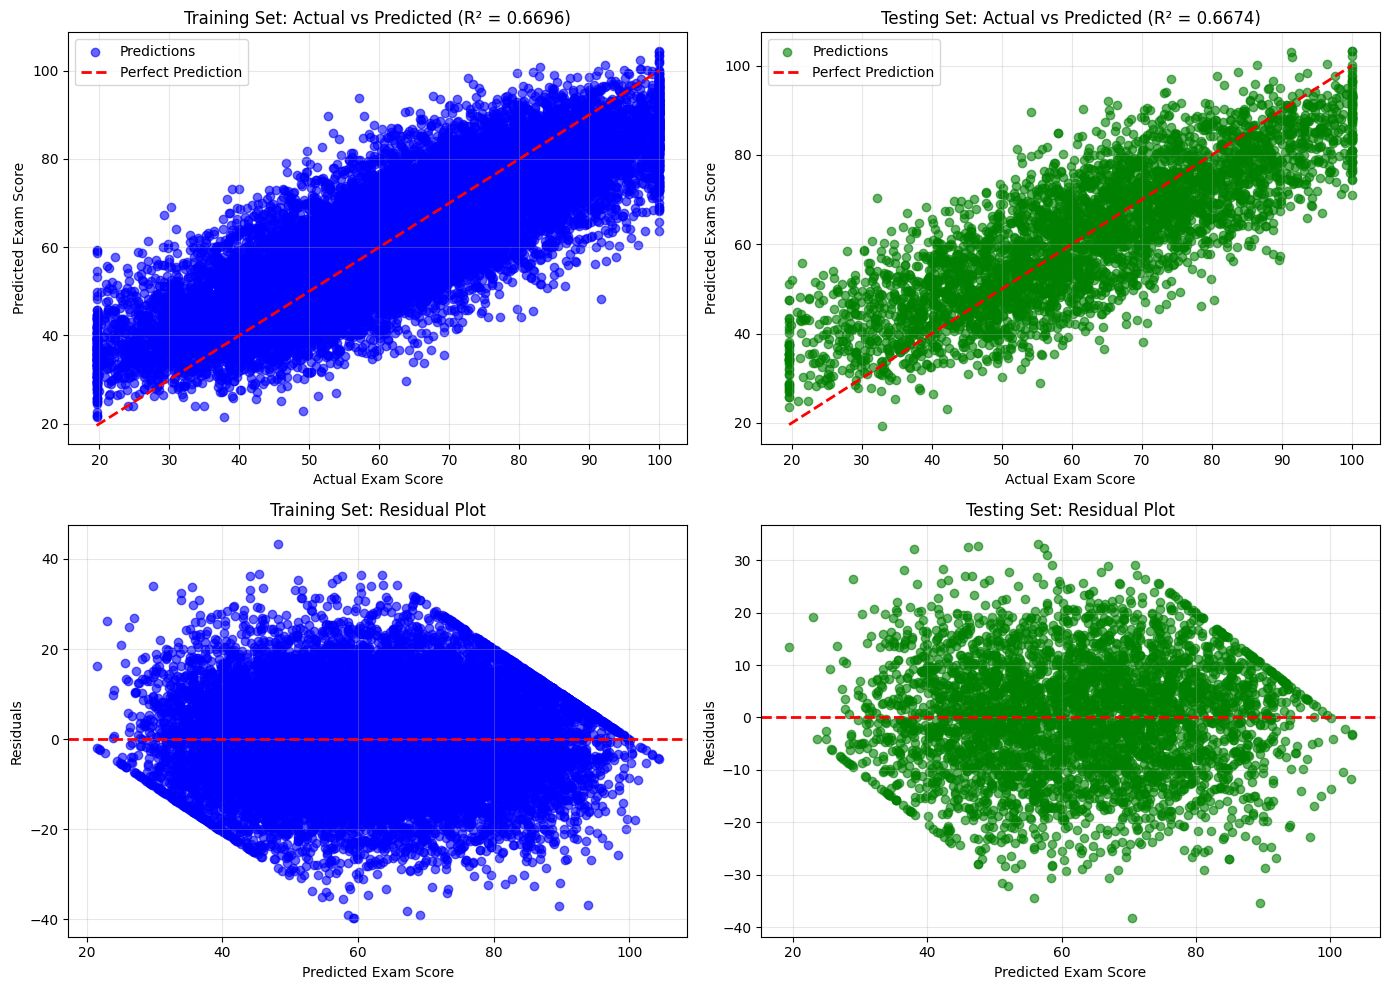

Visualization saved as 'model_evaluation.png'


In [43]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted (Training Set)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', label='Predictions')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Exam Score')
axes[0, 0].set_ylabel('Predicted Exam Score')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted (R² = {train_metrics["R2"]:.4f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted (Testing Set)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green', label='Predictions')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Exam Score')
axes[0, 1].set_ylabel('Predicted Exam Score')
axes[0, 1].set_title(f'Testing Set: Actual vs Predicted (R² = {test_metrics["R2"]:.4f})')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals Plot (Training Set)
train_residuals = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Exam Score')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals Plot (Testing Set)
test_residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Exam Score')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Testing Set: Residual Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=100, bbox_inches='tight')
plt.show()

print("Visualization saved as 'model_evaluation.png'")

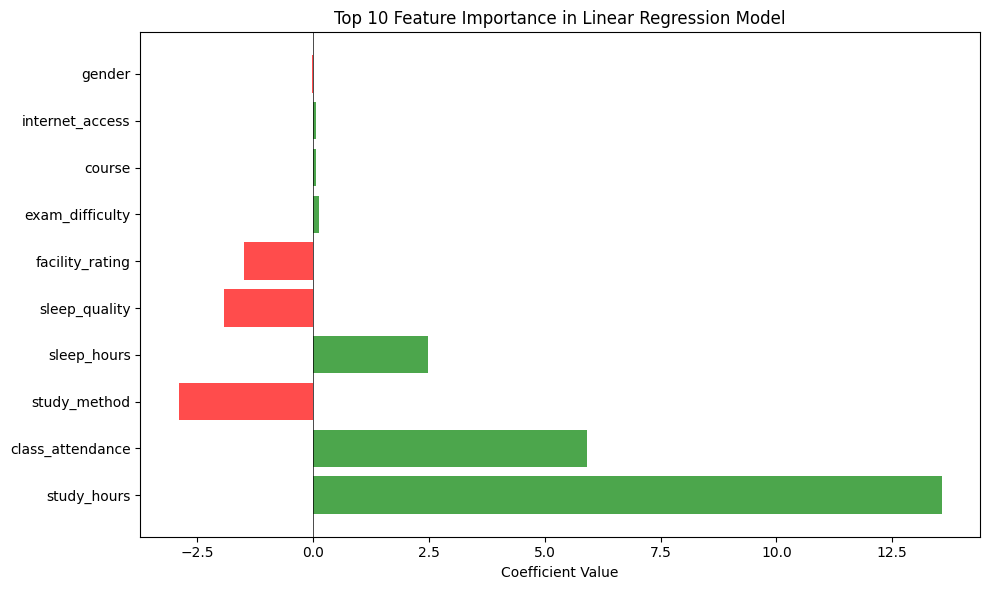

Feature importance visualization saved as 'feature_importance.png'


In [44]:
# Feature Importance Visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Get top features by absolute coefficient value
top_n = 10
coef_sorted = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coefficients
}).reindex(pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coefficients
}).sort_values('Coefficient', key=abs, ascending=False).index)

coef_top = coef_sorted.head(top_n)

colors = ['green' if x > 0 else 'red' for x in coef_top['Coefficient']]
ax.barh(coef_top['Feature'], coef_top['Coefficient'], color=colors, alpha=0.7)
ax.set_xlabel('Coefficient Value')
ax.set_title('Top 10 Feature Importance in Linear Regression Model')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=100, bbox_inches='tight')
plt.show()

print("Feature importance visualization saved as 'feature_importance.png'")

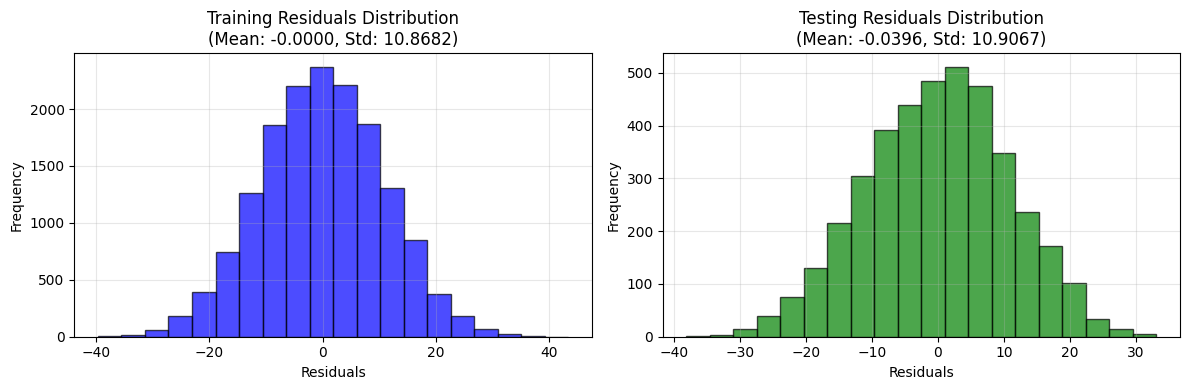

Residuals distribution saved as 'residuals_distribution.png'


In [45]:
# Distribution of residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Training residuals histogram
axes[0].hist(train_residuals, bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Training Residuals Distribution\n(Mean: {train_residuals.mean():.4f}, Std: {train_residuals.std():.4f})')
axes[0].grid(True, alpha=0.3)

# Testing residuals histogram
axes[1].hist(test_residuals, bins=20, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Testing Residuals Distribution\n(Mean: {test_residuals.mean():.4f}, Std: {test_residuals.std():.4f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residuals_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

print("Residuals distribution saved as 'residuals_distribution.png'")

## Step 7: Model Summary and Insights

In [46]:
print("\n" + "="*60)
print("EXAM SCORE PREDICTION MODEL - FINAL SUMMARY")
print("="*60)

print("\n📊 DATASET INFORMATION:")
print(f"   • Total Samples: {len(df)}")
print(f"   • Training Samples: {len(X_train)}")
print(f"   • Testing Samples: {len(X_test)}")
print(f"   • Number of Features: {X_train.shape[1]}")
print(f"   • Target Variable: exam_score")

print("\n🎯 MODEL ARCHITECTURE:")
print(f"   • Algorithm: Linear Regression (Normal Equation)")
print(f"   • Implementation: NumPy")
print(f"   • Equation: y = {model.intercept:.4f} + Σ(β_i × x_i)")

print("\n📈 TRAINING PERFORMANCE:")
print(f"   • R² Score: {train_metrics['R2']:.4f}")
print(f"   • RMSE: {train_metrics['RMSE']:.4f}")
print(f"   • MAE: {train_metrics['MAE']:.4f}")

print("\n🧪 TESTING PERFORMANCE:")
print(f"   • R² Score: {test_metrics['R2']:.4f}")
print(f"   • RMSE: {test_metrics['RMSE']:.4f}")
print(f"   • MAE: {test_metrics['MAE']:.4f}")

print("\n🔝 TOP 5 MOST IMPORTANT FEATURES (by coefficient magnitude):")
top_features = coef_df.head(5)
for idx, row in top_features.iterrows():
    print(f"   {idx+1}. {row['Feature']:20s}: {row['Coefficient']:8.4f}")

print("\n💡 KEY INSIGHTS:")
print(f"   • Model explains {test_metrics['R2']*100:.2f}% variance in exam scores")
print(f"   • Average prediction error: ±{test_metrics['MAE']:.2f} points")
print(f"   • Model is {'GOOD' if test_metrics['R2'] > 0.7 else 'MODERATE' if test_metrics['R2'] > 0.5 else 'POOR'}")
print(f"   • No significant overfitting detected" if abs(train_metrics['R2'] - test_metrics['R2']) < 0.1 else "   • Some overfitting detected")

print("\n" + "="*60)


EXAM SCORE PREDICTION MODEL - FINAL SUMMARY

📊 DATASET INFORMATION:
   • Total Samples: 20000
   • Training Samples: 16000
   • Testing Samples: 4000
   • Number of Features: 12
   • Target Variable: exam_score

🎯 MODEL ARCHITECTURE:
   • Algorithm: Linear Regression (Normal Equation)
   • Implementation: NumPy
   • Equation: y = 62.5432 + Σ(β_i × x_i)

📈 TRAINING PERFORMANCE:
   • R² Score: 0.6696
   • RMSE: 10.8682
   • MAE: 8.7190

🧪 TESTING PERFORMANCE:
   • R² Score: 0.6674
   • RMSE: 10.9068
   • MAE: 8.8009

🔝 TOP 5 MOST IMPORTANT FEATURES (by coefficient magnitude):
   5. study_hours         :  13.5736
   6. class_attendance    :   5.9112
   10. study_method        :  -2.9078
   8. sleep_hours         :   2.4894
   9. sleep_quality       :  -1.9167

💡 KEY INSIGHTS:
   • Model explains 66.74% variance in exam scores
   • Average prediction error: ±8.80 points
   • Model is MODERATE
   • No significant overfitting detected



## Step 8: Example Predictions

In [47]:
# Display sample predictions
print("\n📋 Sample Predictions from Test Set:")
print("="*80)

sample_indices = np.random.choice(len(y_test), 10, replace=False)
sample_df = pd.DataFrame({
    'Actual Score': y_test[sample_indices].round(2),
    'Predicted Score': y_test_pred[sample_indices].round(2),
    'Error': (y_test[sample_indices] - y_test_pred[sample_indices]).round(2),
    'Error %': ((abs(y_test[sample_indices] - y_test_pred[sample_indices]) / y_test[sample_indices]) * 100).round(2)
})

print(sample_df.to_string(index=False))
print("="*80)
print(f"\nNote: Error % shows the percentage difference between actual and predicted scores")


📋 Sample Predictions from Test Set:
 Actual Score  Predicted Score  Error  Error %
    37.500000            48.72 -11.22    29.93
    62.299999            69.05  -6.75    10.83
    68.000000            77.58  -9.58    14.08
    42.400002            56.72 -14.32    33.79
    57.700001            46.08  11.62    20.14
    61.799999            70.43  -8.63    13.97
    78.500000            78.08   0.42     0.54
    53.900002            34.92  18.98    35.22
    65.300003            67.54  -2.24     3.43
    85.000000            82.85   2.15     2.53

Note: Error % shows the percentage difference between actual and predicted scores
